# COMP9444 Group Project - Team: New to Computing

## Introduction
The worldwide outbreak of COVID-19 in 2020 spread fast among countries and has been threatening humanity, health, and daily lifestyles of people. Similar to vicious diseases that have broken out in the past, such as Severe Acute Respiratory Syndrome (SARS) and Middle East Respiratory Syndrome (MERS), COVID-19 attacks the respiratory system of the human body and is highly contagious as it is airborne and thus can transmit among the crowd in public areas. Therefore, the World Health Organization (WHO) suggests that wearing a facemask is a primary method to slow and prevent the spread of the disease, and it is important that people wear facemasks and maintain social-distancing whenever possible to fight the pandemic (Suresh et al., 2021. On the other hand, computer-based image classification has been researched and used in real life for a long time, and in recent years technologies including deep learning and neural network models have been introduced and applied for such tasks, and specifically for face mask detection (Suresh et al., 2021 and Mascarenhas & Agarwal, 2021). The applications of such technologies may help public health officers to quickly and accurately identify people that are not adhering to the requirement of wearing face masks in public areas with high traffic in real time, and ultimately prevent the spread of the virus. 

The aim of this project is to implement several existing Convolutional Neural Network (CNN) models to the task of classifying images of people wearing and not wearing face masks and examine their overall performance on this given task. In addition, possible improvements on the performance these models to this specific task are also proposed.

## Data Source and Analysis
The used dataset was obtained from Kaggle, posted by Omkar Gurav. The URL for the dataset can be found in the reference (Omkar Gurav n.d.). The dataset was created by the author to test the performance of custom CNN models and has 7553 images in total with 3 color channels (RGB). Of these, 1776 images are from the GitHub account of Prajna Bhandary (https://github.com/prajnasb/observations) and the rest 5777 images are collected and filtered from Google search results. These images are then categorized and labelled into two classes, as there are 3828 images of people not wearing face masks and 3725 images of people wearing face masks.

The images of people wearing masks covers multiple angles, including from front, side, looking down and up. There are also masks of various styles, such as medical face masks, N95 grade face masks, cosmetic face masks with decorative patterns and even transparent face masks on males and females of different ethnicities. Some images are slightly rotated, and some are like advertisement with a model and multiple face masks of different styles in one image. In terms of the images for people wearing masks, they also cover faces without masks in many angles, as well as faces of 3D males and females of different ethnicities, 3D models, sculptures, and advertisements. These characteristics may be challenging for the model to correctly classify images into the two classes, especially the ones with transparent face masks.

Data augmentation is done as a preprocessing operation to increase the varieties of dataset and thus help training more robust models. Considering the real-life circumstances and the functions provided by TensorFlow, the following operations are done:
* Rotation
* Zooming
* Width and height shift
* Shearing
* Horizontal flip

80% of the images were used as the training set and 20% were used for validation, and the dataset is also shuffled before the trainings. The code snippets below shows the process of data importation and augmentation.

In [2]:
from keras.preprocessing.image import ImageDataGenerator

INPUT_SIZE = [224, 224]
BATCH = 32

train_val_image_data_generator = ImageDataGenerator(rescale=1.0/255,
                                            rotation_range=20,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode="nearest",
                                            validation_split=0.2
                                            )

train_data = train_val_image_data_generator.flow_from_directory('./data/',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     subset='training',
                                                     classes=['with_mask','without_mask'],
                                                     shuffle=True,
                                                     )
validate_data = train_val_image_data_generator.flow_from_directory('./data/',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     subset='validation',
                                                     classes=['with_mask','without_mask'],
                                                     shuffle=True,
                                                     )

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


Some samples of the dataset are shown below.

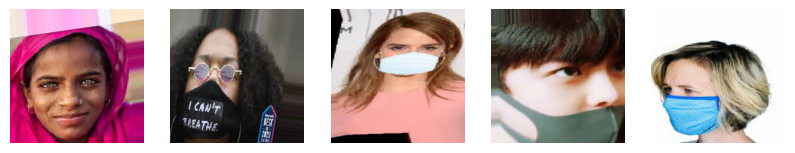

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
for _ in range(5):
    img, label = train_data.next()
    fig.add_subplot(1, 5, _ + 1)
    plt.imshow(img[0])
    plt.axis("off")
plt.show()

## Models and Methods
Several existing CNN models that were used for image classification were chosen and applied to the task. The first selected model was VGG-16, as it has a relatively straight-forward and simple architecture, as well as good performance. It was originally created by Simonyan and Zisserman in 2014 and achieved a test data accuracy of 92.77% with ImageNet, which contains 14 million images and 1000 classes (Simonyan & Zisserman, 2014 and Mascarenhas & Agarwal, 2021). The second chosen model was ResNet-50, as it is a newer model that is renowned for winning 1st place in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2015 classification competition with an error rate of only 3.57%. ResNet-50 is innovative as it attempted to alleviate the increasing error problem that comes with deeper CNN models by adding skip connections, residual blocks, and identity functions (He et al., 2016). Similarly, the next tested model was ResNet-18, which has an architecture same as ResNet but only has 18 layers. Furthermore, MobileNet was also taken into consideration as it was originally designed to be used in mobile and embedded devices and uses depthwise separable convolutions and greatly reduces the number of parameters, compared to other CNN models with regular convolutions, which makes it a lightweight model for devices of less computing power (Howard et al., 2017). This model was tested considering the possible real-time applications of face mask detection in mobile devices. Lastly, InceptionV3 was also selected as it adopts innovative modifications such as wider but shallower layers, factorized convolutions to alleviate representational bottleneck and increase computational efficiency (Szegedy et al., 2016).

These models are constructed using TensorFlow and Keras with resources found online. Once these models are trained, results will be examined, discussed, and used to make possible improvements on existing models.

### VGG-16
The first model we are testing is VGG-16. The architecture of the model can be found in the original paper (Simonyan and Zisserman, 2014). The flatten and dense layers at the end are modified to fit the dataset as we only have two classes instead of 1000 classes. The following code referred to the article by Rohini, 2021.

In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

vgg16 = Sequential()
vgg16.add(Conv2D(input_shape=INPUT_SIZE + [3], filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
vgg16.add(Flatten())
vgg16.add(Dense(units=4096,activation="relu"))
vgg16.add(Dense(units=4096,activation="relu"))
vgg16.add(Dense(units=2, activation="softmax"))
vgg16.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)      

The input size of the original VGG-16 model was (224, 244, 3), which results in a total number of trainable parameters of 134268738. Although the model only has 18 convolutional and max pooling layers, the number of trainable parameters is very high.

Next we compile the model with the loss function set to 'binary_crossentropy' as it is the most common loss function for classification tasks with only 2 classes. The optimizer used is SGD as SGD appears to have better performance for training CNN models on image classification tasks than adaptive optimization algorithms such as Adam (Gupta et al., 2021). The selected metric for evaluation is accuracy. 25 epochs are planned and a early stopping monitor on validation accuracy is set.

The training will be done later with all other models created and compiled.

In [5]:
from keras.callbacks import EarlyStopping

vgg16.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')


### ResNet-50
The next model to be compiled is ResNet-50. The architecture of the model can be found in the original paper by He et al., 2016. The following code referred to the article by Bhattacharyya, 2020. Residual blocks are defined firstly and then the model is constructed.

In [7]:
from keras.layers import AveragePooling2D, BatchNormalization, Input, ZeroPadding2D, MaxPooling2D
from tensorflow.keras import Model
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Add

def identity_block(layer, filter_num1, filter_num2):
    layer_skip = layer

    layer = Conv2D(filter_num1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)

    layer = Conv2D(filter_num1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)

    layer = Conv2D(filter_num2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(layer)
    layer = BatchNormalization()(layer)

    layer = Add()([layer, layer_skip])
    layer = ReLU()(layer)

    return layer

def conv_block(layer, strides, filter_num1, filter_num2):
    layer_skip = layer

    layer = Conv2D(filter_num1, kernel_size=(1, 1), strides=strides, padding='valid', kernel_regularizer=l2(0.001))(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)

    layer = Conv2D(filter_num1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)

    layer = Conv2D(filter_num2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(layer)
    layer = BatchNormalization()(layer)

    layer_skip = Conv2D(filter_num2, kernel_size=(1, 1), strides=strides, padding='valid', kernel_regularizer=l2(0.001))(layer_skip)
    layer_skip = BatchNormalization()(layer_skip)

    layer = Add()([layer, layer_skip])
    layer = ReLU()(layer)

    return layer

resnet50_input = Input(shape=INPUT_SIZE + [3])
resnet50_layer = ZeroPadding2D(padding=(3, 3))(resnet50_input)

resnet50_layer = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2))(resnet50_layer)
resnet50_layer = BatchNormalization()(resnet50_layer)
resnet50_layer = ReLU()(resnet50_layer)
resnet50_layer = MaxPooling2D((3, 3), strides=(2, 2),padding='same')(resnet50_layer)

resnet50_layer = conv_block(resnet50_layer, strides=(1, 1), filter_num1=64, filter_num2=256)
resnet50_layer = identity_block(resnet50_layer, filter_num1=64, filter_num2=256)
resnet50_layer = identity_block(resnet50_layer, filter_num1=64, filter_num2=256)

resnet50_layer = conv_block(resnet50_layer, strides=(2, 2), filter_num1=128, filter_num2=512)
resnet50_layer = identity_block(resnet50_layer, filter_num1=128, filter_num2=512)
resnet50_layer = identity_block(resnet50_layer, filter_num1=128, filter_num2=512)
resnet50_layer = identity_block(resnet50_layer, filter_num1=128, filter_num2=512)

resnet50_layer = conv_block(resnet50_layer, strides=(2, 2), filter_num1=256, filter_num2=1024)
resnet50_layer = identity_block(resnet50_layer, filter_num1=256, filter_num2=1024)
resnet50_layer = identity_block(resnet50_layer, filter_num1=256, filter_num2=1024)
resnet50_layer = identity_block(resnet50_layer, filter_num1=256, filter_num2=1024)
resnet50_layer = identity_block(resnet50_layer, filter_num1=256, filter_num2=1024)
resnet50_layer = identity_block(resnet50_layer, filter_num1=256, filter_num2=1024)

resnet50_layer = conv_block(resnet50_layer, strides=(2, 2), filter_num1=512, filter_num2=2048)
resnet50_layer = identity_block(resnet50_layer, filter_num1=512, filter_num2=2048)
resnet50_layer = identity_block(resnet50_layer, filter_num1=512, filter_num2=2048)

resnet50_layer = AveragePooling2D()(resnet50_layer)
resnet50_layer = Flatten()(resnet50_layer)
resnet50_layer = Dense(units=2, activation='softmax')(resnet50_layer)

resnet50 = Model(inputs=resnet50_input, outputs=resnet50_layer)
resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d_13[0][0]                  
______________________________________________________________________________________________

The model has only 23624578 trainable parameters, which is significantly less than the VGG-16 model. The last two layers are modified to fit the dataset, and the model is compiled using similar configuration as the VGG-16 model.

In [8]:
resnet50.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

### ResNet-18
The architecture of ResNet-18 can be found in the original paper by He et al., 2016. The model is then created based on the architecture in the article and the residual blocks of the ResNet-50 model presented above.

In [9]:
def identity_block(layer, filter_num):
    
    layer_skip = layer

    layer = Conv2D(filter_num, kernel_size=(3, 3), strides=(1, 1), padding='same')(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)

    layer = Conv2D(filter_num, kernel_size=(3, 3), strides=(1, 1),  padding='same')(layer)
    layer = BatchNormalization()(layer)
    
    layer = Add()([layer, layer_skip])
    layer = ReLU()(layer)
    return layer

def conv_block(layer, strides, filter_num):
    layer_skip = layer

    layer = Conv2D(filter_num, kernel_size=(3, 3), strides=strides, padding='same')(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)

    layer = Conv2D(filter_num, kernel_size=(3, 3), strides=(1, 1), padding='same')(layer)
    layer = BatchNormalization()(layer)

    layer_skip = Conv2D(filter_num, kernel_size=(1, 1), strides=strides, padding='valid')(layer_skip)
    layer_skip = BatchNormalization()(layer_skip)

    layer = Add()([layer, layer_skip])
    layer = ReLU()(layer)

    return layer

resnet18_input = Input(shape=INPUT_SIZE + [3])
resnet18_layer = ZeroPadding2D(padding=(3, 3))(resnet18_input)

resnet18_layer = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2))(resnet18_layer)
resnet18_layer = BatchNormalization()(resnet18_layer)
resnet18_layer = ReLU()(resnet18_layer)
resnet18_layer = MaxPooling2D((3, 3), strides=(2, 2),padding='same')(resnet18_layer)

resnet18_layer = identity_block(resnet18_layer, filter_num=64)
resnet18_layer = identity_block(resnet18_layer, filter_num=64)

resnet18_layer = conv_block(resnet18_layer, strides=(2, 2), filter_num=128)
resnet18_layer = identity_block(resnet18_layer, filter_num=128)

resnet18_layer = conv_block(resnet18_layer, strides=(2, 2), filter_num=256)
resnet18_layer = identity_block(resnet18_layer, filter_num=256)

resnet18_layer = conv_block(resnet18_layer, strides=(2, 2), filter_num=512)
resnet18_layer = identity_block(resnet18_layer, filter_num=512)

resnet18_layer = AveragePooling2D()(resnet18_layer)
resnet18_layer = Flatten()(resnet18_layer)
resnet18_layer = Dense(units=2, activation='softmax')(resnet18_layer)

resnet18 = Model(inputs=resnet18_input, outputs=resnet18_layer)
resnet18.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 112, 112, 64) 256         conv2d_66[0][0]                  
____________________________________________________________________________________________

The model is compiled with similar configurations, and since it has less layers, the total number of parameters is further decreased to only 11200130.

In [10]:
resnet18.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

### MobileNet
The architecture of MobileNet can be found in the original paper by Howard et al., 2017. The implementation here using TensorFlow referred to the article by Sarkar, 2021.

In [11]:
from keras.layers import DepthwiseConv2D

def mobilnet_block (layer, strides, filter_num):
    layer = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)
    
    layer = Conv2D(filters=filter_num, kernel_size=1, strides=1)(layer)
    layer = BatchNormalization()(layer)
    layer = ReLU()(layer)
    
    return layer

mobilenet_input = Input(shape=INPUT_SIZE + [3])
mobilenet_layer = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(mobilenet_input)
mobilenet_layer = BatchNormalization()(mobilenet_layer)
mobilenet_layer = ReLU()(mobilenet_layer)

mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=64, strides=(1, 1))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=128, strides=(2, 2))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=128, strides=(1, 1))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=256, strides=(2, 2))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=256, strides=(1, 1))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=512, strides=(2, 2))
for _ in range (5):
    mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=512, strides=(1, 1))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=1024, strides=(2, 2))
mobilenet_layer = mobilnet_block(mobilenet_layer, filter_num=1024, strides=(1, 1))
mobilenet_layer = AveragePooling2D(pool_size=(7, 7), strides=(1, 1), data_format='channels_first')(mobilenet_layer)
mobilenet_layer = Flatten()(mobilenet_layer)
mobilenet_output = Dense(units=2, activation='softmax')(mobilenet_layer)

mobilenet = Model(inputs=mobilenet_input, outputs=mobilenet_output)
mobilenet.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_73 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_66 (ReLU)              (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_74 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_67 (ReLU)              (None, 112, 112, 32)      0   

The MobileNet model has considerably lowest number of total parameters than the models presented above, with only 3254062 parameters. Similarly, it is compiled with aforementioned configurations.

In [12]:
mobilenet.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

### InceptionV3
The architecture of InceptionV3 can be found in the original paper by Szegedy et al., 2016. Here the model to be tested is directly imported from Keras, with altered top layers to fit the dataset.


In [13]:
inceptionv3 = tensorflow.keras.applications.InceptionV3(input_shape=INPUT_SIZE + [3], include_top=False, weights=None)

last_layer = inceptionv3.get_layer('mixed10')
last_output = last_layer.output

inception_layer_result = Flatten()(last_output)
inception_layer_result = Dense(512, activation='relu')(inception_layer_result)               
inception_layer_result = Dense(2, activation='softmax')(inception_layer_result)           

inceptionv3_model = Model(inputs=inceptionv3.input, outputs=inception_layer_result)
inceptionv3_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 111, 111, 32) 96          conv2d_100[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_100[0][0]    
____________________________________________________________________________________________

InceptionV3 has 48018722 total parameters, which is about double to the total number of parameters for ResNet-50. It is configured similarly as well.

In [14]:
inceptionv3_model.compile(
  loss='binary_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

### First Training

In [44]:
vgg16_history = vgg16.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es]
)

Epoch 1/25
189/189 [==============================] - 157s 825ms/step - loss: 0.6929 - accuracy: 0.5325 - val_loss: 0.6927 - val_accuracy: 0.5066
Epoch 2/25
189/189 [==============================] - 146s 769ms/step - loss: 0.6920 - accuracy: 0.5261 - val_loss: 0.6912 - val_accuracy: 0.5179
Epoch 3/25
189/189 [==============================] - 144s 761ms/step - loss: 0.6895 - accuracy: 0.6071 - val_loss: 0.6870 - val_accuracy: 0.7702
Epoch 4/25
189/189 [==============================] - 151s 798ms/step - loss: 0.6821 - accuracy: 0.6892 - val_loss: 0.6812 - val_accuracy: 0.5748
Epoch 5/25
189/189 [==============================] - 94s 492ms/step - loss: 0.6596 - accuracy: 0.6608 - val_loss: 0.7524 - val_accuracy: 0.4993
Epoch 6/25
189/189 [==============================] - 96s 507ms/step - loss: 0.5772 - accuracy: 0.7083 - val_loss: 0.3829 - val_accuracy: 0.8596
Epoch 7/25
189/189 [==============================] - 93s 493ms/step - loss: 0.4695 - accuracy: 0.7824 - val_loss: 0.3683 - va

KeyboardInterrupt: 

In [16]:
resnet50_history = resnet50.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es]
)

Epoch 1/25
189/189 [==============================] - 74s 347ms/step - loss: 19.4820 - accuracy: 0.6887 - precision_1: 0.6887 - recall_1: 0.6887 - val_loss: 18.8023 - val_accuracy: 0.5199 - val_precision_1: 0.5199 - val_recall_1: 0.5199
Epoch 2/25
189/189 [==============================] - 61s 322ms/step - loss: 18.5455 - accuracy: 0.8067 - precision_1: 0.8067 - recall_1: 0.8067 - val_loss: 18.1273 - val_accuracy: 0.8828 - val_precision_1: 0.8828 - val_recall_1: 0.8828
Epoch 3/25
189/189 [==============================] - 62s 329ms/step - loss: 18.3005 - accuracy: 0.8262 - precision_1: 0.8262 - recall_1: 0.8262 - val_loss: 18.2710 - val_accuracy: 0.7596 - val_precision_1: 0.7596 - val_recall_1: 0.7596
Epoch 4/25
189/189 [==============================] - 61s 324ms/step - loss: 18.0824 - accuracy: 0.8598 - precision_1: 0.8598 - recall_1: 0.8598 - val_loss: 17.8979 - val_accuracy: 0.8828 - val_precision_1: 0.8828 - val_recall_1: 0.8828
Epoch 5/25
189/189 [==============================] 

In [17]:
resnet18_history = resnet18.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es]
)

Epoch 1/25
189/189 [==============================] - 64s 330ms/step - loss: 0.5895 - accuracy: 0.7816 - precision_2: 0.7816 - recall_2: 0.7816 - val_loss: 1.2042 - val_accuracy: 0.5444 - val_precision_2: 0.5444 - val_recall_2: 0.5444
Epoch 2/25
189/189 [==============================] - 61s 322ms/step - loss: 0.3413 - accuracy: 0.8602 - precision_2: 0.8602 - recall_2: 0.8602 - val_loss: 0.3005 - val_accuracy: 0.8828 - val_precision_2: 0.8828 - val_recall_2: 0.8828
Epoch 3/25
189/189 [==============================] - 62s 326ms/step - loss: 0.2552 - accuracy: 0.8982 - precision_2: 0.8982 - recall_2: 0.8982 - val_loss: 0.2508 - val_accuracy: 0.9020 - val_precision_2: 0.9020 - val_recall_2: 0.9020
Epoch 4/25
189/189 [==============================] - 61s 322ms/step - loss: 0.2186 - accuracy: 0.9146 - precision_2: 0.9146 - recall_2: 0.9146 - val_loss: 0.3062 - val_accuracy: 0.8921 - val_precision_2: 0.8921 - val_recall_2: 0.8921
Epoch 5/25
189/189 [==============================] - 62s 32

In [18]:
mobilenet_history = mobilenet.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es]
)

Epoch 1/25
189/189 [==============================] - 65s 327ms/step - loss: 0.6480 - accuracy: 0.6282 - precision_3: 0.6282 - recall_3: 0.6282 - val_loss: 0.7237 - val_accuracy: 0.5066 - val_precision_3: 0.5066 - val_recall_3: 0.5066
Epoch 2/25
189/189 [==============================] - 61s 320ms/step - loss: 0.4687 - accuracy: 0.7768 - precision_3: 0.7768 - recall_3: 0.7768 - val_loss: 0.9865 - val_accuracy: 0.5066 - val_precision_3: 0.5066 - val_recall_3: 0.5066
Epoch 3/25
189/189 [==============================] - 61s 319ms/step - loss: 0.3842 - accuracy: 0.8274 - precision_3: 0.8274 - recall_3: 0.8274 - val_loss: 1.6144 - val_accuracy: 0.5066 - val_precision_3: 0.5066 - val_recall_3: 0.5066
Epoch 4/25
189/189 [==============================] - 60s 318ms/step - loss: 0.3476 - accuracy: 0.8504 - precision_3: 0.8504 - recall_3: 0.8504 - val_loss: 1.3725 - val_accuracy: 0.4921 - val_precision_3: 0.4921 - val_recall_3: 0.4921
Epoch 5/25
189/189 [==============================] - 60s 31

In [19]:
inceptionv3_model_history = inceptionv3_model.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es]
)

Epoch 1/25
189/189 [==============================] - 73s 343ms/step - loss: 0.5850 - accuracy: 0.7001 - precision_4: 0.7001 - recall_4: 0.7001 - val_loss: 0.9756 - val_accuracy: 0.5066 - val_precision_4: 0.5066 - val_recall_4: 0.5066
Epoch 2/25
189/189 [==============================] - 60s 320ms/step - loss: 0.4325 - accuracy: 0.8046 - precision_4: 0.8046 - recall_4: 0.8046 - val_loss: 0.4135 - val_accuracy: 0.8119 - val_precision_4: 0.8119 - val_recall_4: 0.8119
Epoch 3/25
189/189 [==============================] - 60s 316ms/step - loss: 0.3565 - accuracy: 0.8481 - precision_4: 0.8481 - recall_4: 0.8481 - val_loss: 0.8247 - val_accuracy: 0.6921 - val_precision_4: 0.6921 - val_recall_4: 0.6921
Epoch 4/25
189/189 [==============================] - 60s 318ms/step - loss: 0.3098 - accuracy: 0.8655 - precision_4: 0.8655 - recall_4: 0.8655 - val_loss: 0.5050 - val_accuracy: 0.8126 - val_precision_4: 0.8126 - val_recall_4: 0.8126
Epoch 5/25
189/189 [==============================] - 60s 31

## Results - Frist Training
### VGG-16

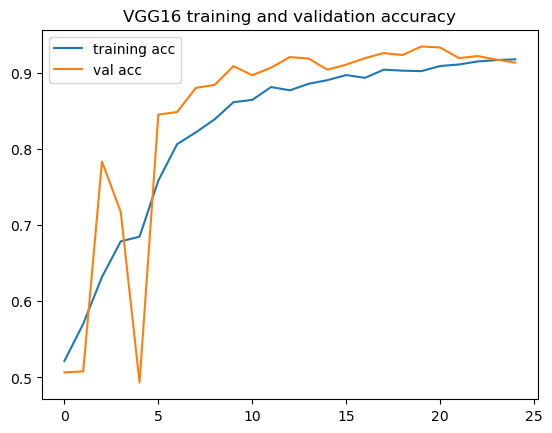

In [20]:
plt.plot(vgg16_history.history['accuracy'], label='training acc')
plt.plot(vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('VGG16 training and validation accuracy - T1')
plt.show()


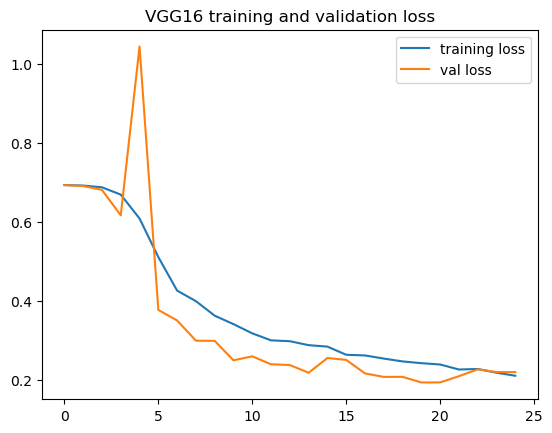

In [21]:
plt.plot(vgg16_history.history['loss'], label='training loss')
plt.plot(vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('VGG16 training and validation loss - T1')
plt.show()

### ResNet-50

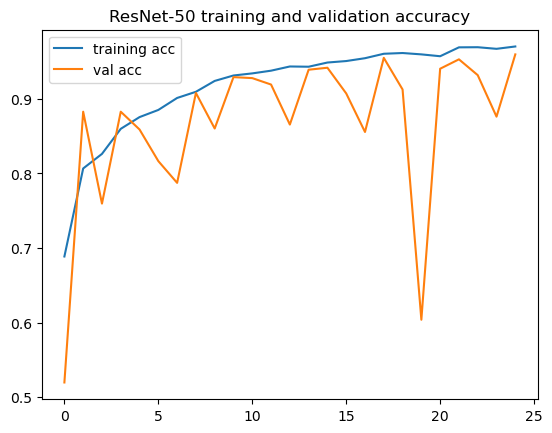

In [22]:
plt.plot(resnet50_history.history['accuracy'], label='training acc')
plt.plot(resnet50_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('ResNet-50 training and validation accuracy - T1')
plt.show()

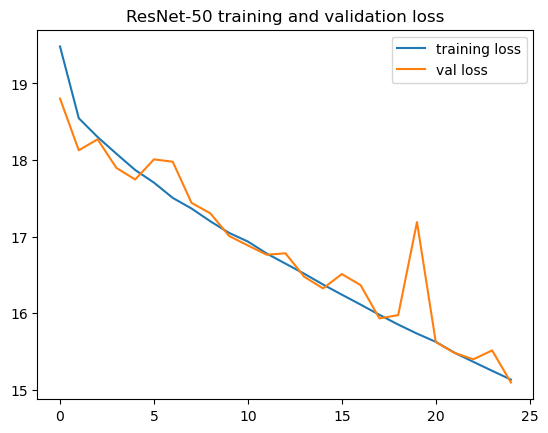

In [23]:
plt.plot(resnet50_history.history['loss'], label='training loss')
plt.plot(resnet50_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('ResNet-50 training and validation loss - T1')
plt.show()

### ResNet-18

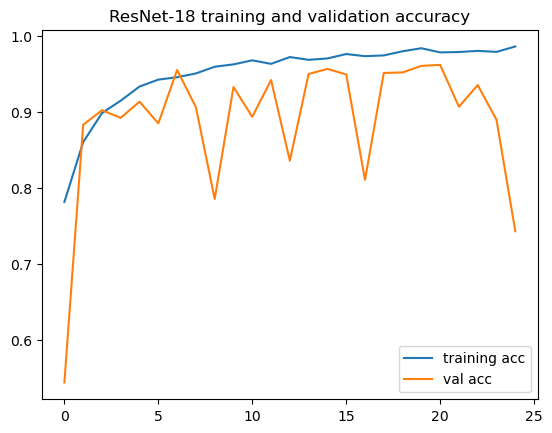

In [24]:
plt.plot(resnet18_history.history['accuracy'], label='training acc')
plt.plot(resnet18_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('ResNet-18 training and validation accuracy - T1')
plt.show()

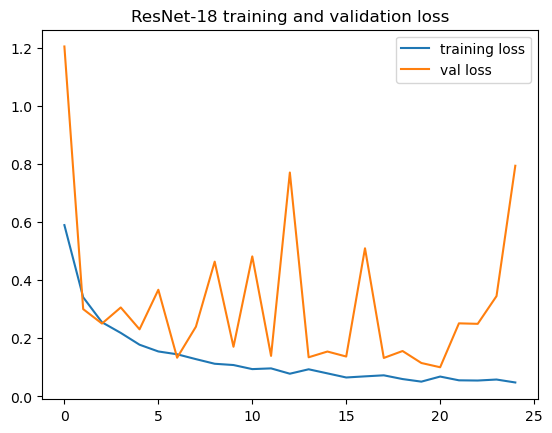

In [25]:
plt.plot(resnet18_history.history['loss'], label='training loss')
plt.plot(resnet18_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('ResNet-18 training and validation loss')
plt.show()

### MobileNet

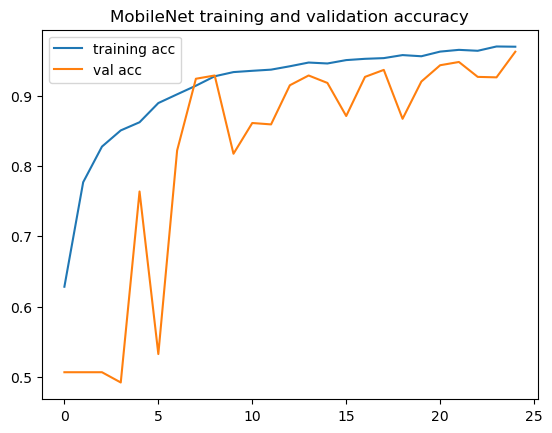

In [26]:
plt.plot(mobilenet_history.history['accuracy'], label='training acc')
plt.plot(mobilenet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('MobileNet training and validation accuracy - T1')
plt.show()

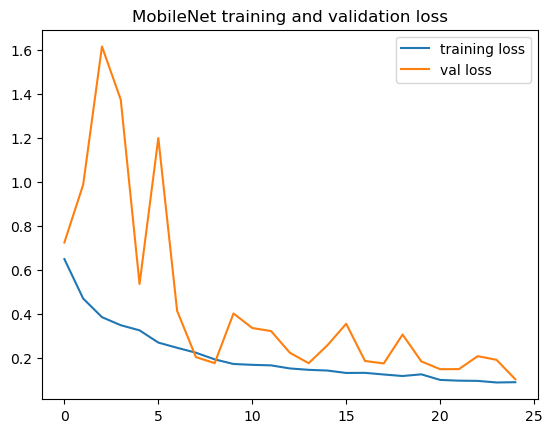

In [27]:
plt.plot(mobilenet_history.history['loss'], label='training loss')
plt.plot(mobilenet_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('MobileNet training and validation loss - T1')
plt.show()

### InceptionV3

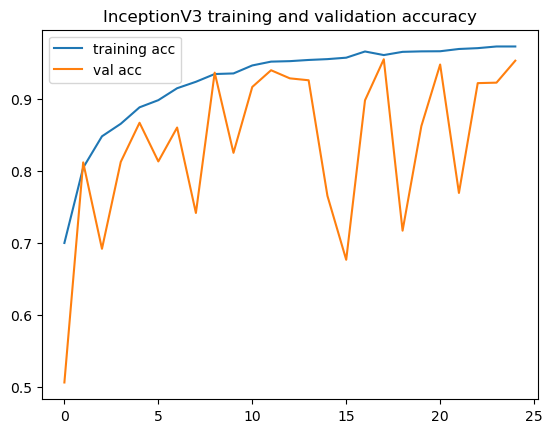

In [28]:
plt.plot(inceptionv3_model_history.history['accuracy'], label='training acc')
plt.plot(inceptionv3_model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('InceptionV3 training and validation accuracy - T1')
plt.show()

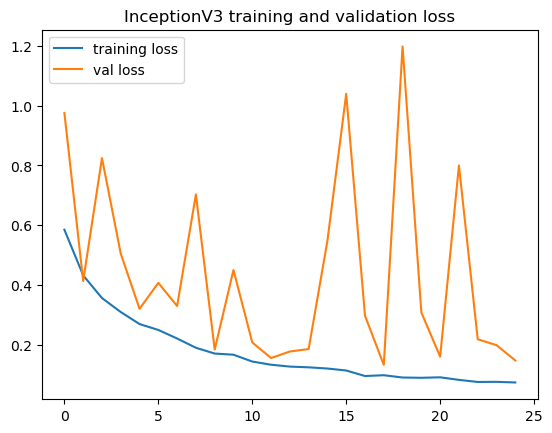

In [29]:
plt.plot(inceptionv3_model_history.history['loss'], label='training loss')
plt.plot(inceptionv3_model_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('InceptionV3 training and validation loss - T1')
plt.show()

### Validation accuracy and loss of all models - T1

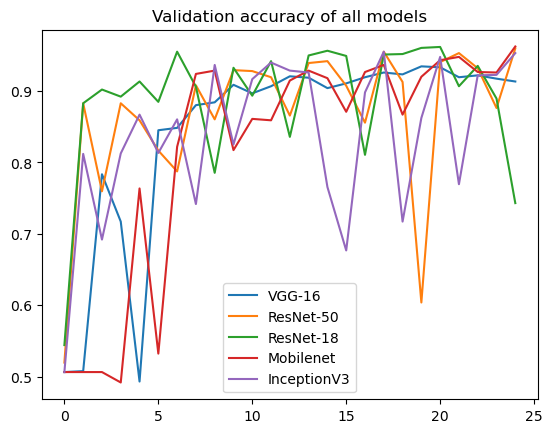

In [30]:
plt.plot(vgg16_history.history['val_accuracy'], label='VGG-16')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet-50')
plt.plot(resnet18_history.history['val_accuracy'], label='ResNet-18')
plt.plot(mobilenet_history.history['val_accuracy'], label='Mobilenet')
plt.plot(inceptionv3_model_history.history['val_accuracy'], label='InceptionV3')
plt.legend()
plt.title('Validation accuracy of all models - T1')
plt.show()

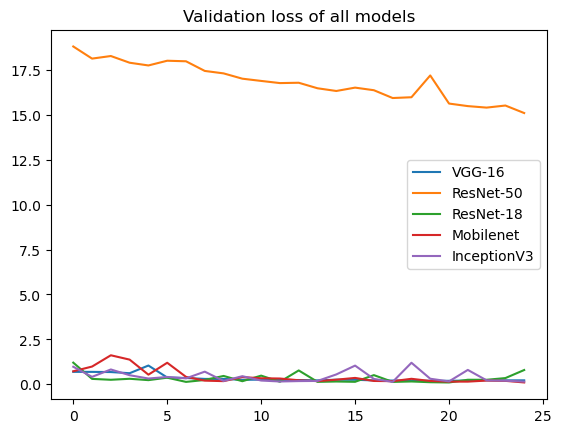

In [31]:
plt.plot(vgg16_history.history['val_loss'], label='VGG-16')
plt.plot(resnet50_history.history['val_loss'], label='ResNet-50')
plt.plot(resnet18_history.history['val_loss'], label='ResNet-18')
plt.plot(mobilenet_history.history['val_loss'], label='Mobilenet')
plt.plot(inceptionv3_model_history.history['val_loss'], label='InceptionV3')
plt.legend()
plt.title('Validation loss of all models - T1')
plt.show()

From the results of the first training, we can see that although all models can reach a validation accuracy at more than 90% at certain epochs, the huge fluctuations in the validation loss have caused the enormous changes in the validation accuracy. For all models except ResNet-50, the validation losses are around and under the range of 1 to 2, but for ResNet-50, the validation loss started at slightly below 19 and gradually decreased through the epochs. This phenomenon indicates that the learning rate of the models were likely to be quite high and thus the performance of the models appeared to be unstable. He et al., 2019, who experimented parameter adjustments and other techniques on a series of ResNet architectures has stated similar findings, as learning rates that are too large would result in instability during the training process.

Consequently, for the second training, a learning rate reducer is introduced. The learning rate reducer is set to monitor validation loss, and once it stops improving for 1 epoch, the learning rate would be decreased by half. 

### Second Training

In [6]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5, 
    patience=1, 
    verbose=1)

In [ ]:
vgg16_history = vgg16.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es, reduce_lr]
)

In [38]:
resnet50_history = resnet50.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es, reduce_lr]
)

Epoch 1/25
189/189 [==============================] - 68s 357ms/step - loss: 17.2599 - accuracy: 0.9575 - precision_1: 0.9575 - recall_1: 0.9575 - val_loss: 17.2695 - val_accuracy: 0.9563 - val_precision_1: 0.9563 - val_recall_1: 0.9563
Epoch 2/25
189/189 [==============================] - 68s 357ms/step - loss: 17.2574 - accuracy: 0.9624 - precision_1: 0.9624 - recall_1: 0.9624 - val_loss: 17.2785 - val_accuracy: 0.9517 - val_precision_1: 0.9517 - val_recall_1: 0.9517

Epoch 00002: ReduceLROnPlateau reducing learning rate to 7.450580430390374e-11.
Epoch 3/25
189/189 [==============================] - 68s 357ms/step - loss: 17.2613 - accuracy: 0.9588 - precision_1: 0.9588 - recall_1: 0.9588 - val_loss: 17.2758 - val_accuracy: 0.9510 - val_precision_1: 0.9510 - val_recall_1: 0.9510

Epoch 00003: ReduceLROnPlateau reducing learning rate to 3.725290215195187e-11.
Epoch 4/25
189/189 [==============================] - 68s 361ms/step - loss: 17.2707 - accuracy: 0.9558 - precision_1: 0.9558 -

In [14]:
resnet18_history = resnet18.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es, reduce_lr]
)

Epoch 1/25
189/189 [==============================] - 60s 307ms/step - loss: 0.5853 - accuracy: 0.7855 - precision_2: 0.7855 - recall_2: 0.7855 - val_loss: 0.7505 - val_accuracy: 0.6384 - val_precision_2: 0.6384 - val_recall_2: 0.6384
Epoch 2/25
189/189 [==============================] - 57s 301ms/step - loss: 0.3408 - accuracy: 0.8610 - precision_2: 0.8610 - recall_2: 0.8610 - val_loss: 0.8932 - val_accuracy: 0.7000 - val_precision_2: 0.7000 - val_recall_2: 0.7000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 3/25
189/189 [==============================] - 57s 303ms/step - loss: 0.2319 - accuracy: 0.9039 - precision_2: 0.9039 - recall_2: 0.9039 - val_loss: 0.3364 - val_accuracy: 0.8556 - val_precision_2: 0.8556 - val_recall_2: 0.8556
Epoch 4/25
189/189 [==============================] - 57s 301ms/step - loss: 0.2047 - accuracy: 0.9226 - precision_2: 0.9226 - recall_2: 0.9226 - val_loss: 0.5754 - val_accuracy: 0.7788 - val_precision_2: 0.7788 - v

In [17]:
mobilenet_history = mobilenet.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es, reduce_lr]
)

Epoch 1/25
189/189 [==============================] - 64s 339ms/step - loss: 0.2226 - accuracy: 0.9146 - precision_3: 0.9146 - recall_3: 0.9146 - val_loss: 0.2109 - val_accuracy: 0.9232 - val_precision_3: 0.9232 - val_recall_3: 0.9232
Epoch 2/25
189/189 [==============================] - 63s 332ms/step - loss: 0.2242 - accuracy: 0.9153 - precision_3: 0.9153 - recall_3: 0.9153 - val_loss: 0.2224 - val_accuracy: 0.9152 - val_precision_3: 0.9152 - val_recall_3: 0.9152

Epoch 00002: ReduceLROnPlateau reducing learning rate to 3.814697180359872e-08.
Epoch 3/25
189/189 [==============================] - 62s 329ms/step - loss: 0.2400 - accuracy: 0.9067 - precision_3: 0.9067 - recall_3: 0.9067 - val_loss: 0.2010 - val_accuracy: 0.9159 - val_precision_3: 0.9159 - val_recall_3: 0.9159
Epoch 4/25
189/189 [==============================] - 63s 330ms/step - loss: 0.2245 - accuracy: 0.9154 - precision_3: 0.9154 - recall_3: 0.9154 - val_loss: 0.2063 - val_accuracy: 0.9159 - val_precision_3: 0.9159 - 

In [20]:
inceptionv3_model_history = inceptionv3_model.fit(
  train_data,
  validation_data=validate_data,
  epochs=25,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data),
  callbacks=[es, reduce_lr]
)

Epoch 1/25
189/189 [==============================] - 78s 366ms/step - loss: 0.5795 - accuracy: 0.7066 - precision_4: 0.7066 - recall_4: 0.7066 - val_loss: 1.3302 - val_accuracy: 0.5066 - val_precision_4: 0.5066 - val_recall_4: 0.5066
Epoch 2/25
189/189 [==============================] - 64s 340ms/step - loss: 0.4048 - accuracy: 0.8188 - precision_4: 0.8188 - recall_4: 0.8188 - val_loss: 0.5443 - val_accuracy: 0.7179 - val_precision_4: 0.7179 - val_recall_4: 0.7179
Epoch 3/25
189/189 [==============================] - 64s 336ms/step - loss: 0.3067 - accuracy: 0.8694 - precision_4: 0.8694 - recall_4: 0.8694 - val_loss: 0.4008 - val_accuracy: 0.8225 - val_precision_4: 0.8225 - val_recall_4: 0.8225
Epoch 4/25
189/189 [==============================] - 63s 334ms/step - loss: 0.2510 - accuracy: 0.8972 - precision_4: 0.8972 - recall_4: 0.8972 - val_loss: 0.4358 - val_accuracy: 0.8205 - val_precision_4: 0.8205 - val_recall_4: 0.8205

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.

## Results - Second Training
### VGG-16

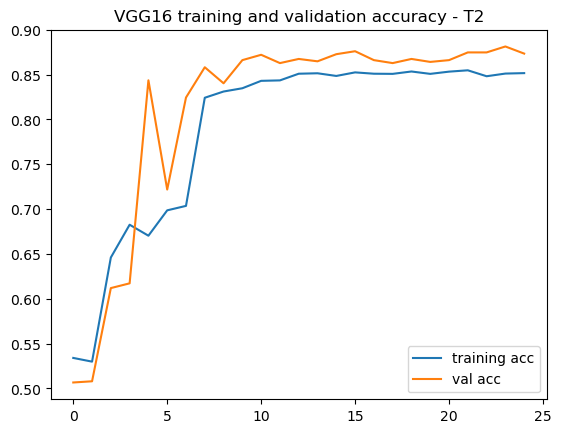

In [21]:
plt.plot(vgg16_history.history['accuracy'], label='training acc')
plt.plot(vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('VGG16 training and validation accuracy - T2')
plt.show()

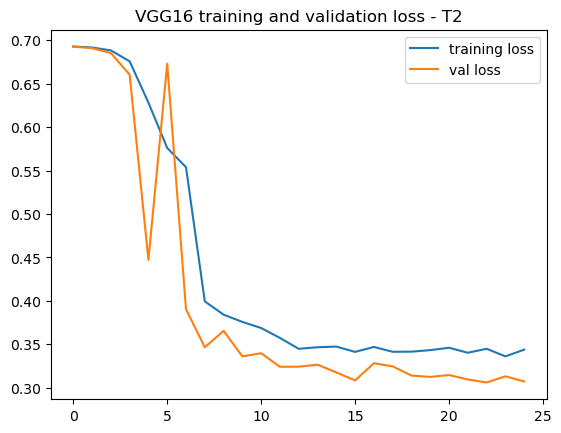

In [22]:
plt.plot(vgg16_history.history['loss'], label='training loss')
plt.plot(vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('VGG16 training and validation loss - T2')
plt.show()

### ResNet-50

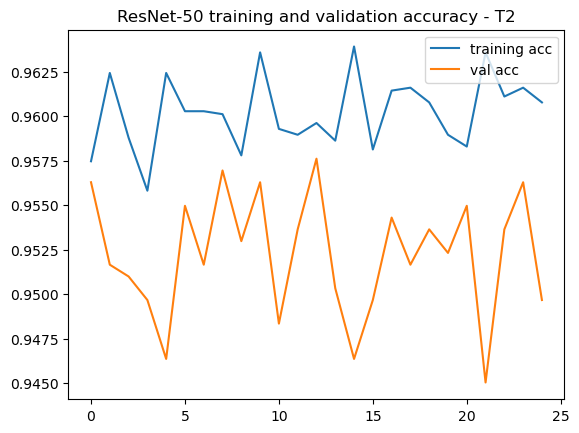

In [39]:
plt.plot(resnet50_history.history['accuracy'], label='training acc')
plt.plot(resnet50_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('ResNet-50 training and validation accuracy - T2')
plt.show()

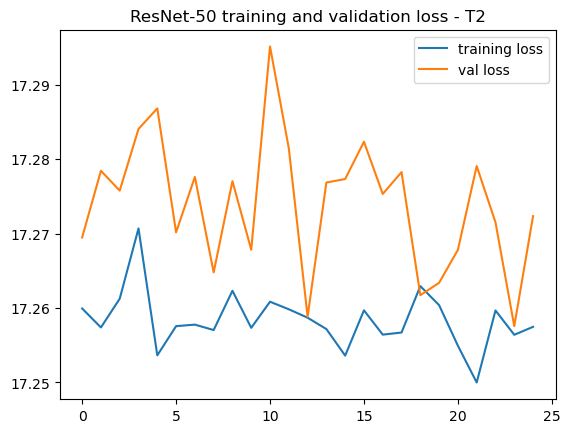

In [40]:
plt.plot(resnet50_history.history['loss'], label='training loss')
plt.plot(resnet50_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('ResNet-50 training and validation loss - T2')
plt.show()

### ResNet-18

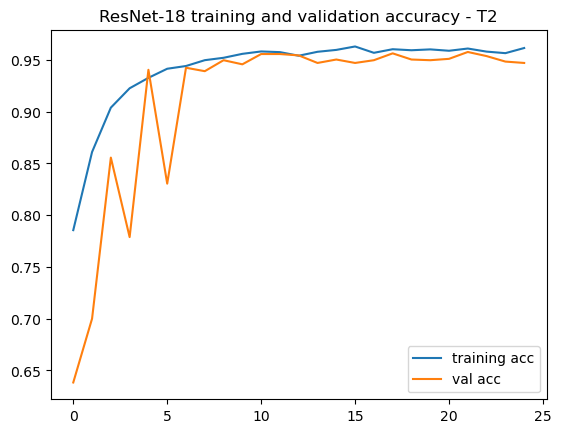

In [25]:
plt.plot(resnet18_history.history['accuracy'], label='training acc')
plt.plot(resnet18_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('ResNet-18 training and validation accuracy - T2')
plt.show()

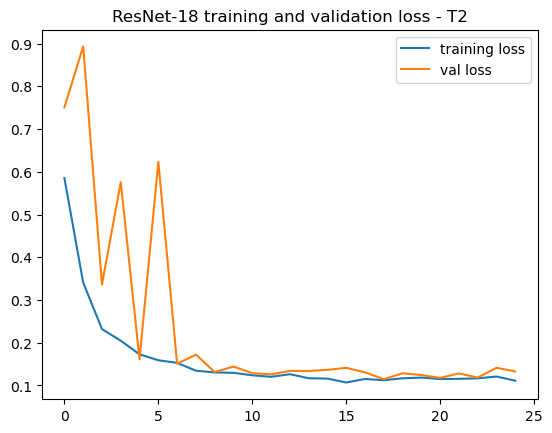

In [26]:
plt.plot(resnet18_history.history['loss'], label='training loss')
plt.plot(resnet18_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('ResNet-18 training and validation loss - T2')
plt.show()

### MobileNet

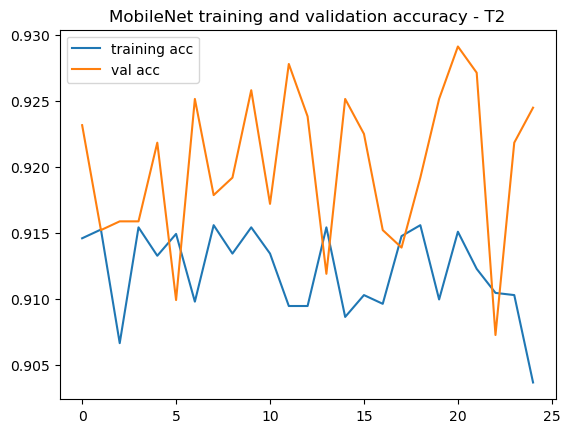

In [27]:
plt.plot(mobilenet_history.history['accuracy'], label='training acc')
plt.plot(mobilenet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('MobileNet training and validation accuracy - T2')
plt.show()

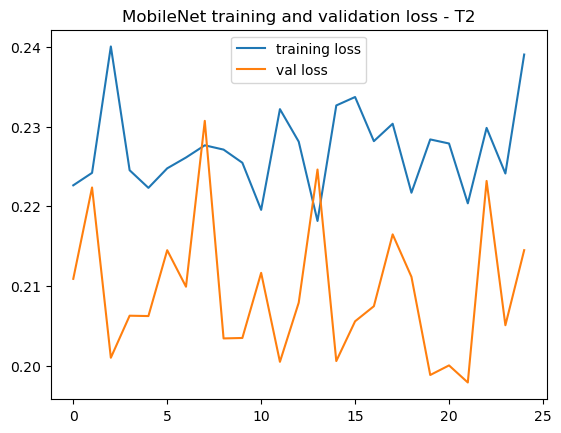

In [45]:
plt.plot(mobilenet_history.history['loss'], label='training loss')
plt.plot(mobilenet_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('MobileNet training and validation loss - T2')
plt.show()

### InceptionV3

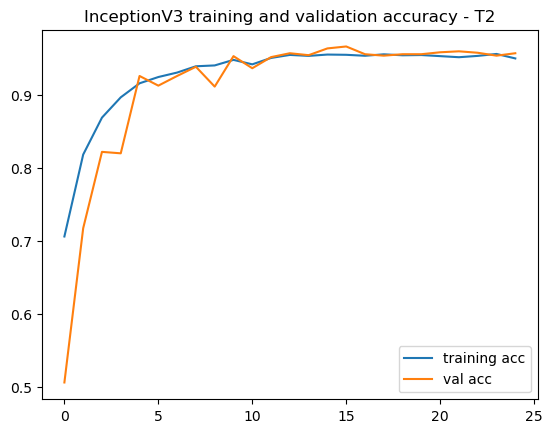

In [29]:
plt.plot(inceptionv3_model_history.history['accuracy'], label='training acc')
plt.plot(inceptionv3_model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('InceptionV3 training and validation accuracy - T2')
plt.show()

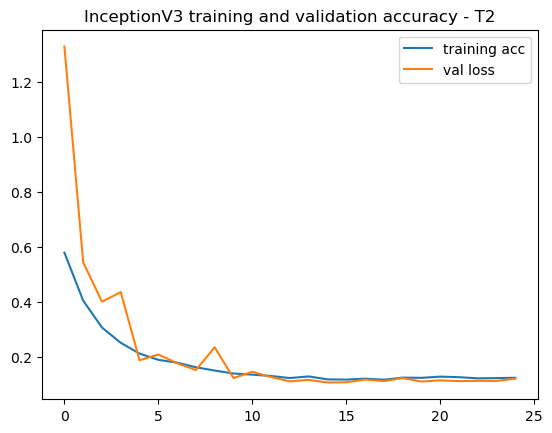

In [46]:
plt.plot(inceptionv3_model_history.history['loss'], label='training acc')
plt.plot(inceptionv3_model_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('InceptionV3 training and validation accuracy - T2')
plt.show()

### Validation accuracy and loss of all models - T2

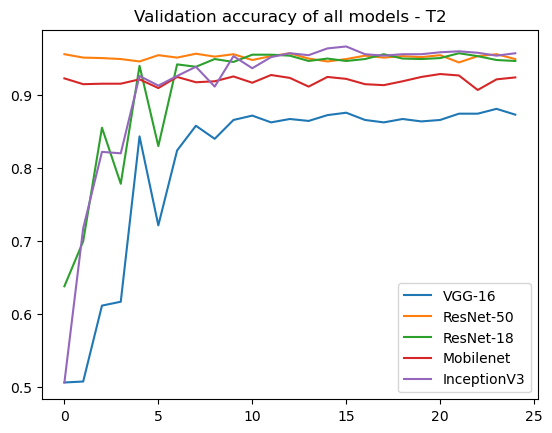

In [41]:
plt.plot(vgg16_history.history['val_accuracy'], label='VGG-16')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet-50')
plt.plot(resnet18_history.history['val_accuracy'], label='ResNet-18')
plt.plot(mobilenet_history.history['val_accuracy'], label='Mobilenet')
plt.plot(inceptionv3_model_history.history['val_accuracy'], label='InceptionV3')
plt.legend()
plt.title('Validation accuracy of all models - T2')
plt.show()

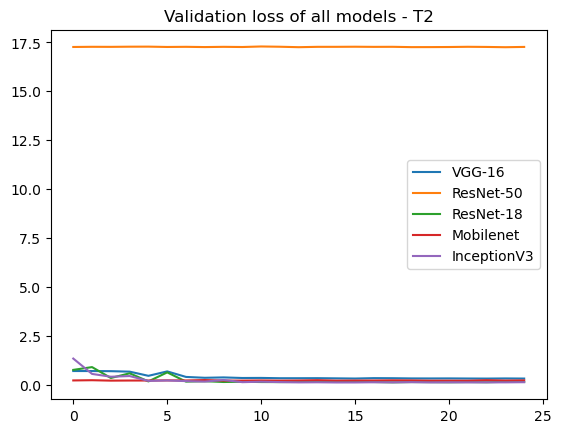

In [42]:
plt.plot(vgg16_history.history['val_loss'], label='VGG-16')
plt.plot(resnet50_history.history['val_loss'], label='ResNet-50')
plt.plot(resnet18_history.history['val_loss'], label='ResNet-18')
plt.plot(mobilenet_history.history['val_loss'], label='Mobilenet')
plt.plot(inceptionv3_model_history.history['val_loss'], label='InceptionV3')
plt.legend()
plt.title('Validation loss of all models - T2')
plt.show()

The considerable fluctuations in validation loss and accuracy were greatly ameliorated by introducing the learning rate reducer. For VGG-16, the validation accuracy at the first epochs was slightly above 0.5, and then increased drastically in the next 8 epochs. During which, the validation accuracy changed dramatically from 0.8437 to 0.7219, and thus the learning rate reducer decreased the learning rate to about 0.005. After initial epochs, the validation accuracy increased steadily in general, though some minor fluctuations were observed. This behavior was seen in all models which suggested the use of learning rate reducer could provide profound help in stabilizing the training process. When the training was completed, the validation accuracy VGG-16 model reached 0.8735, which is lower than that of the first training, which was 0.9132. The model also took the longest time to complete the training, which was 27 minutes and 14.9 seconds. A possible reason for this could be its highest number of parameters in total, despite the straightforward architecture. However, in both trainings the VGG-16 model exhibited a higher validation accuracy than training accuracy, which may indicate the reduced complexity of the validation set.

In terms of ResNet-50 and ResNet-18, the validation accuracies were considerably higher than the relatively simple VGG-16 model, as the former reached 0.9497, and the latter reach 0.9470 upon training completion. While ResNet-50 required 27 minutes and 35.2 seconds for training, which was the longest training time among models, ResNet-18 only used 24 minutes and 49.7 seconds and was the quickest model to train. This may possibly be due to the reduced layer number in the latter, which was only 18 layers, compared to the 50 layers in ResNet-50. However, it is worth pointing out that despite the validation loss of ResNet-50 began at 17.2695, which was extremely higher than the loss of other models.

For MobileNet, the training took 26 minutes and 39.4 seconds, and the validation accuracy ended up at 0.9245. This accuracy was much higher than the VGG-16 model, but lower than the ResNets and the InceptionV3 model. Unlike VGG16, ResNet-18 and InceptionV3, the validation accuracy of MobileNet and ResNet-50 started at around 0.9 at the first epoch, while others started at about 0.5.
InceptionV3 model achieved the highest validation accuracy, which was 0.9576, and the time consumed was 26 minutes and 10.6 seconds, higher than the ResNet-18 but lower than the VGG-16 model, close to the time required by MobileNet.


| Model      | Training time | Val accuracy |
| ---------- | ------------ | ------------- |
| VGG-16     |27m 14.9s |0.9497|
| ResNet-50	 |27m 35.2s	|0.9497|
| ResNet-18	 |24m 49.7s	|0.9470|
| MobileNet	 |26m 39.4s	|0.9245|
| InceptionV3|26m 10.6s	|0.9576|


## Attempted Improvements
With the findings in both trainings, some modifications were made to the models to see if the performance can be improved. The first idea is to introduce dropout layers. While dropout layers are effect against overfitting in the model training and the sign of overfitting was not obvious from the results of two training sessions. Specifically, only the loss of ResNet-50 and MobileNet were fluctuating during the training as other model maintained a generally declining trend. Srivastava et al., 2014 pointed out that dropout can effectively increase the generalization performance of models on a variety of tasks, including image classification. The second idea is to use global average pooling layer to replace the traditional fully connected layers at the top of CNN models for image classification tasks. The global average pooling layers provide similar functions as fully connected layers but have no parameters to be optimized and therefore should improve robustness of the spatial conversion of the input and ultimately generalization performance of models (Zhu et al., 2022). Considering that the validation accuracy of MobileNet was lower than the other 3 advanced models, these modifications were fit to the original MobileNet model.

In [16]:
from keras.layers import GlobalAveragePooling2D, Reshape, Dropout, Activation

def depth_point_conv2d(x,s=[1,1,2,1],channel=[64,128]):
    dw1 = DepthwiseConv2D((3,3),strides=s[0],padding='same')(x)
    bn1 = BatchNormalization()(dw1)
    relu1 = ReLU()(bn1)
    pw1 = Conv2D(channel[0],(1,1),strides=s[1],padding='same')(relu1)
    bn2 = BatchNormalization()(pw1)
    relu2 = ReLU()(bn2)
    dw2 = DepthwiseConv2D((3,3),strides=s[2],padding='same')(relu2)
    bn3 = BatchNormalization()(dw2)
    relu3 = ReLU()(bn3)
    pw2 = Conv2D(channel[1],(1,1),strides=s[3],padding='same')(relu3)
    bn4 = BatchNormalization()(pw2)
    relu4 = ReLU()(bn4)
    
    return relu4
    
def repeat_conv(x,s=[1,1],channel=512):
    dw1 = DepthwiseConv2D((3,3),strides=s[0],padding='same')(x)
    bn1 = BatchNormalization()(dw1)
    relu1 = ReLU()(bn1)
    pw1 = Conv2D(channel,(1,1),strides=s[1],padding='same')(relu1)
    bn2 = BatchNormalization()(pw1)
    relu2 = ReLU()(bn2)
    
    return relu2

dropout=0.5
h0=Input(shape=INPUT_SIZE + [3])
h1=Conv2D(32,(3,3),strides = 2,padding="same")(h0)
h2= BatchNormalization()(h1)
h3=ReLU()(h2)
h4 = depth_point_conv2d(h3,s=[1,1,2,1],channel=[64,128])
h5 = depth_point_conv2d(h4,s=[1,1,2,1],channel=[128,256])
h6 = depth_point_conv2d(h5,s=[1,1,2,1],channel=[256,512])
h7 = repeat_conv(h6)
h8 = repeat_conv(h7)
h9 = repeat_conv(h8)
h10 = repeat_conv(h9)
h11 = repeat_conv(h10)
h12 = depth_point_conv2d(h10,s=[2,1,2,1],channel=[512,1024])
h13 = GlobalAveragePooling2D()(h12)
h14 = Reshape((1, 1, 1024))(h13)
h15 = Dropout(dropout)(h14)
h16 = Conv2D(2, (1, 1),padding='same')(h15)

h17 = Activation('softmax')(h16)
h18 = Reshape((2,))(h17)
improved_mobilenet = Model(h0,h18)


improved_mobilenet.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_194 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_93 (ReLU)              (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d_13 (Depthwi (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_195 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_94 (ReLU)              (None, 112, 112, 32)      0   

The total number of parameters are further reduced to only 2173826. 

In [17]:
improved_mobilenet.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
improved_mobilenet_history = improved_mobilenet.fit( 
 train_data, 
 validation_data=validate_data,
 epochs=25, 
 steps_per_epoch=len(train_data),
 validation_steps=len(validate_data),
 callbacks=[es, reduce_lr]
)

Epoch 1/25
 90/189 [=============>................] - ETA: 36s - loss: 0.6754 - accuracy: 0.6267

d:\Anaconda\envs\COMP9444\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 [==============================] - 95s 455ms/step - loss: 0.5897 - accuracy: 0.6915 - val_loss: 0.7112 - val_accuracy: 0.5066
Epoch 2/25
189/189 [==============================] - 63s 335ms/step - loss: 0.4542 - accuracy: 0.7923 - val_loss: 0.7620 - val_accuracy: 0.5066

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 3/25
189/189 [==============================] - 62s 325ms/step - loss: 0.3529 - accuracy: 0.8473 - val_loss: 0.9828 - val_accuracy: 0.5066

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 4/25
189/189 [==============================] - 61s 320ms/step - loss: 0.3084 - accuracy: 0.8689 - val_loss: 0.2932 - val_accuracy: 0.8649
Epoch 5/25
189/189 [==============================] - 61s 323ms/step - loss: 0.2722 - accuracy: 0.8852 - val_loss: 0.1741 - val_accuracy: 0.9344
Epoch 6/25
189/189 [==============================] - 63s 331ms/step - loss: 0.2597 - accuracy: 0.8943 - val_loss: 0.1763 - v

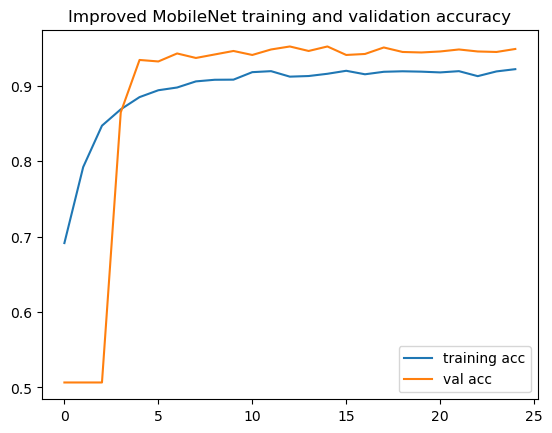

In [19]:
plt.plot(improved_mobilenet_history.history['accuracy'], label='training acc')
plt.plot(improved_mobilenet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Improved MobileNet training and validation accuracy')
plt.show()

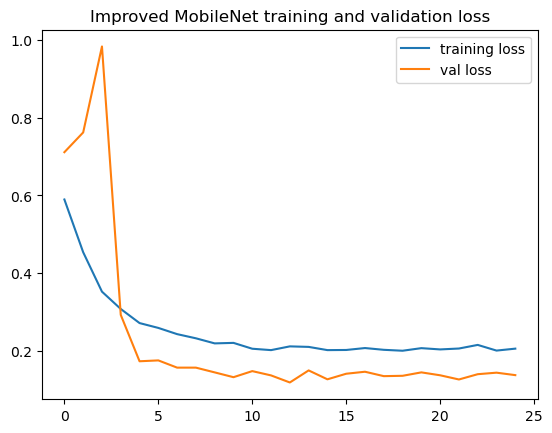

In [20]:
plt.plot(improved_mobilenet_history.history['loss'], label='training loss')
plt.plot(improved_mobilenet_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Improved MobileNet training and validation loss')
plt.show()

The modified MobileNet model consumed similar time as the original MobileNet model, but the validation accuracy was increased from 0.9245 to 0.9490 when the training finished. Although the improvement was quite minor, it still indicates that such modifications could be valuable in improving the generalization of a model and prevent the potential risk of overfitting. Furthermore, the training process became steadier compared to that of the second training.

On the other hand, it is also noticed that the top dense layers of the VGG-16 model contained a quite high number of parameters and the validation accuracy was the lowest among the models. Here the top flatten and fully connected layers were replaced by a global average pooling layer to see what improvements may be possible.

In [32]:
improved_vgg16 = Sequential()
improved_vgg16.add(Conv2D(input_shape=INPUT_SIZE + [3], filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
improved_vgg16.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
improved_vgg16.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
improved_vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
improved_vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
improved_vgg16.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
improved_vgg16.add(GlobalAveragePooling2D())
improved_vgg16.add(Dense(units=2, activation="softmax"))
improved_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_248 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_251 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 56, 56, 256)      

As the fully connected layers were replaced, the total number of parameters drastically decreased to only 14715714.

In [35]:
improved_vgg16.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

improved_vgg16_history = improved_vgg16.fit( 
 train_data, 
 validation_data=validate_data,
 epochs=25, 
 steps_per_epoch=len(train_data),
 validation_steps=len(validate_data),
 callbacks=[es, reduce_lr]
)

Epoch 1/25
189/189 [==============================] - 70s 364ms/step - loss: 0.6888 - accuracy: 0.5211 - val_loss: 0.6852 - val_accuracy: 0.5642
Epoch 2/25
189/189 [==============================] - 68s 357ms/step - loss: 0.6822 - accuracy: 0.5645 - val_loss: 0.6832 - val_accuracy: 0.5060
Epoch 3/25
189/189 [==============================] - 74s 388ms/step - loss: 0.6616 - accuracy: 0.6272 - val_loss: 0.6322 - val_accuracy: 0.7146
Epoch 4/25
189/189 [==============================] - 64s 339ms/step - loss: 0.5730 - accuracy: 0.7241 - val_loss: 0.5358 - val_accuracy: 0.7437
Epoch 5/25
189/189 [==============================] - 63s 333ms/step - loss: 0.5471 - accuracy: 0.7347 - val_loss: 0.6502 - val_accuracy: 0.5954

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 6/25
189/189 [==============================] - 64s 340ms/step - loss: 0.5125 - accuracy: 0.7531 - val_loss: 0.3991 - val_accuracy: 0.8536
Epoch 7/25
189/189 [==============================

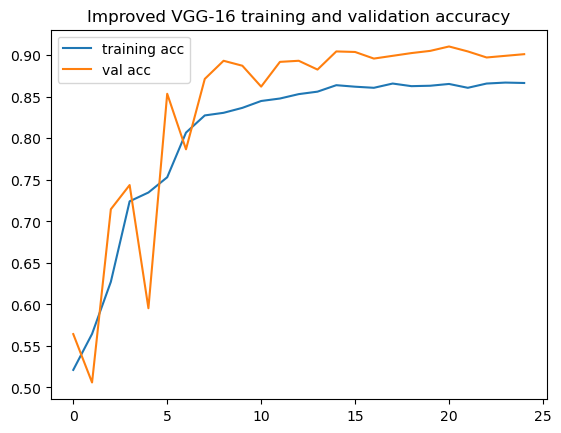

In [36]:
plt.plot(improved_vgg16_history.history['accuracy'], label='training acc')
plt.plot(improved_vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Improved VGG-16 training and validation accuracy')
plt.show()

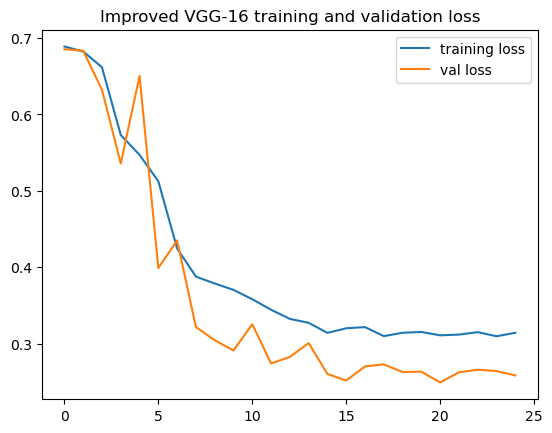

In [37]:
plt.plot(improved_vgg16_history.history['loss'], label='training loss')
plt.plot(improved_vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Improved VGG-16 training and validation loss')
plt.show()

From the results it could be seen that the total time used for the training was nearly unchanged, but the performance of the model was increased to some extent. With the original setup, the validation accuracy of VGG-16 model was 0.8735 when the training finished, compared to 0.9013 of the new setups.

However, the fluctuations in the validation loss and consequently the validation accuracy appeared to be worse than the original setup. 


## Discussion and Conclusion
The experiments with existing models and the selected dataset showed interesting results. The tested models did not exhibit significant differences in total training time except for ResNet-18, which used the least amount of time to train. Although InceptionV3 achieved the highest validation accuracy, the minor advantage could be easily offset by the shortened training time of ResNet-18, which makes it the best performer for the task with the selected dataset. On the other hand, VGG-16 appeared to be the worst performer due to its lowest validation accuracy in nearly the same amount of time. It is possible that the relatively simple structure of the model could not obtain as sufficient generalization as other models. The unmodified dense layers at its top resulted in a very high number of parameters and were unnecessary for this task and as could be replaced by global average pooling layers, which would result in better performance.

There are several limitations during the conduction of the project. One is that the only metric that is used to evaluate model performance is the validation accuracy, which may be insufficient. Ideally, the analysis could also include metrics such as precision, recall and F1-score, which could provide more information on the performance of models. Another limitation is that the project was carried out on a local laptop. The mediocre hardware slowed down the process of experiments as a single run would take nearly 2 hours. If the project is executed in Google Collab, the increased speed of training could enable tuning and testing more adjustments and modifications in hyperparameters and model structures. Additionally, the validation set might be problematic as validation accuracy of VGG-16 and ResNet-18 appeared to be higher than training accuracy, which indicates that the validation set might be less characteristic and challenging than the training set. If possible, the process of selecting dataset should be more careful and thoughtful, and it is best to test models under multiple datasets for the same task.

In the future, the various techniques to reduce overfitting and increase generalization could be integrated and the structures of models could be further optimized to achieve higher performance in a shorter amount of time and improve the performance of real-time face detection applications in terms of accuracy and speed.


## References
Bhattacharyya, S. 2020, Understand and Implement ResNet-50 with TensorFlow 2.0, Medium, viewed on 13th November 2022, <https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691>.

Gupta, A., Ramanath, R., Shi, J. and Keerthi, S.S. 2021, ‘Adam vs. SGD: Closing the generalization gap on image classification’, OPT2021: 13th Annual Workshop on Optimization for Machine Learning.
Gurav, O. n.d., Face Mask Detection Dataset, viewed on 9th November 2022, <https://www.kaggle.com/datasets/omkargurav/face-mask-dataset>. 

He, K.M., Zhang, X., Ren, S. and Sun, J. 2016, ‘Deep residual learning for image recognition’, Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 770-778.

Howard, A.G., Zhu, M., Chen, B., Kalenichenko, D., Wang, W., Weyand, T., Andreetto, M. and Adam, H. 2017, ‘Mobilenets: Efficient convolutional neural networks for mobile vision applications’, arXiv preprint.

He, T., Zhang, Z., Zhang, H., Zhang, Z., Xie, J. and Li, M. 2019, ‘Bag of tricks for image classification with convolutional neural networks’, Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition, pp. 558-567.

Mascarenhas, S. and Agarwal, M. 2021, ‘A comparison between VGG16, VGG19 and ResNet50 architecture frameworks for Image Classification’, 2021 International Conference on Disruptive Technologies for Multi-Disciplinary Research and Applications (CENTCON), pp. 96-99.

Rohini, G., 2021, Everything you need to know about VGG16, Medium, viewed on 13th November 2022, <https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918>.
Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I. and Salakhutdinov, R., 2014, ‘Dropout: a simple way to prevent neural networks from overfitting’, The journal of machine learning research, vol. 15, no.1, pp.1929-1958.

Simonyan, K. and Zisserman, A., 2014, ‘Very deep convolutional networks for large-scale image recognition’, arXiv preprint.

Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J. and Wojna, Z., 2016, ‘Rethinking the inception architecture for computer vision’, Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 2818-2826.

Sarkar A. 2021, Building MobileNet from Scratch Using TensorFlow, Medium, viewed on 13th November 2022, <https://towardsdatascience.com/building-mobilenet-from-scratch-using-tensorflow-ad009c5dd42c>.
Suresh, K., Palangappa, M. and Bhuvan, S. 2021, ‘Face Mask Detection by using Optimistic Convolutional Neural Network,’ 2021, 6th International Conference on Inventive Computation Technologies (ICICT), pp. 1084-1089.

Shirivastava, N. and Vimal, C. 2022, ‘Face and Face-mask Detection System using VGG-16’ 2022, International Journal of Computer Applications, vol.183, no.50, pp. 16-21.

Zhu, F., Liu, C., Yang, J. and Wang, S. 2022, ‘An Improved MobileNet Network with Wavelet Energy and Global Average Pooling for Rotating Machinery Fault Diagnosis’, Sensors, vol. 22, no.12, p.4427.